**EDA**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 20.5 MB/s 


In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
from phik import resources, report
import warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv("/content/drive/MyDrive/train_users_2.csv")
print(train.shape)
train.head(5)

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


**We have about 213k training data points with 16 columns**

In [5]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

**There are many null values for date_first_booking, age, first_affiliate_tracked**

In [6]:
session = pd.read_csv("/content/drive/MyDrive/sessions.csv")

print(session.shape)

print("\nColumns:",session.columns)

session.head()


(10567737, 6)

Columns: Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [7]:
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

**We have many null values for all column except device_type.**

In [8]:
session_df = session.dropna(subset = ['user_id'])
print(session.shape)


(10567737, 6)



**We drop those records which have null for user_id and see no of unique users.**



In [9]:
session['user_id'].nunique()

135483

**Now we will observe action performed by users**

In [10]:
session['action_detail'].value_counts()

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
tos_2014                          2
host_refund_guest                 2
host_respond_page                 2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64

In [11]:
session['action'].value_counts()

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
events                  1
reactivate              1
desks                   1
nyan                    1
Name: action, Length: 359, dtype: int64

In [12]:
session['action_type'].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

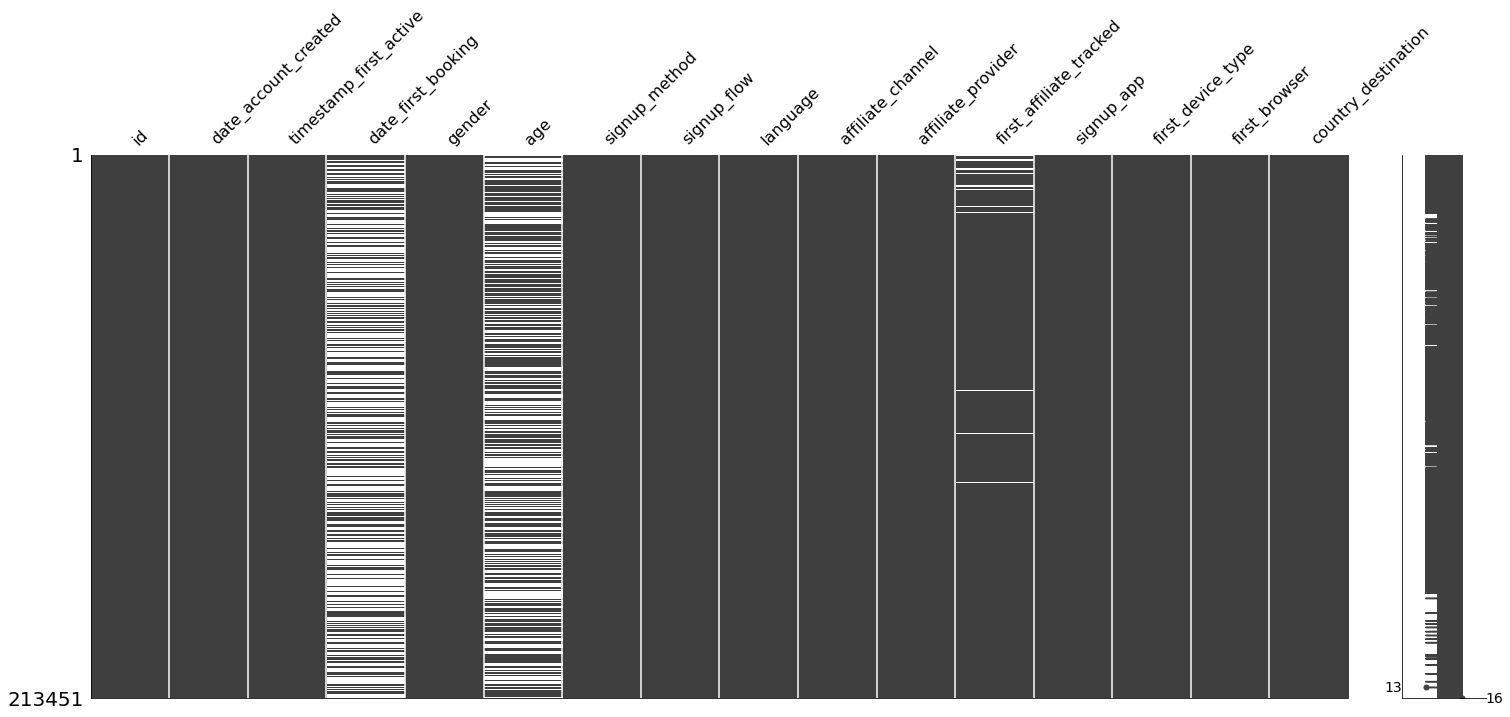

In [13]:
import missingno as miss                    #www.github.com
miss.matrix(train)
sns.despine()

We observe from above figure that we have missing values for date_first_booking, age, first_affiliate_tracked column. We will be using apt way to deal with this. 

In [14]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

*Univariate Analysis*

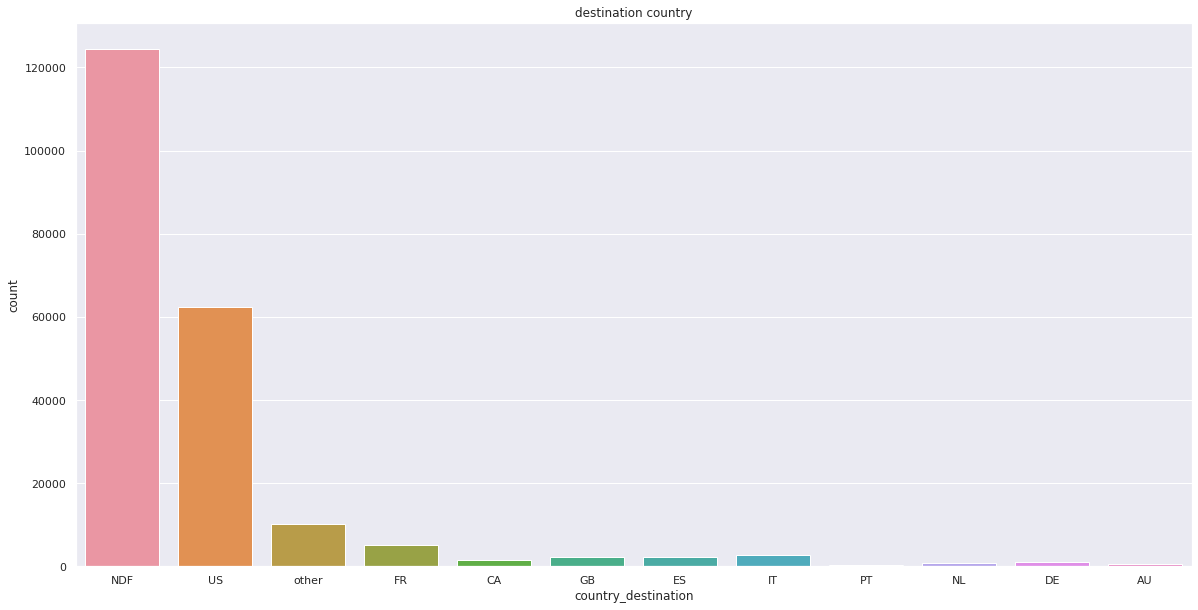

In [15]:
plt.figure(figsize=(20,10))                         #www.github.com

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=train)

plt.title("destination country")

plt.show()

**We observe that most no of users have NDF as country_destination implying no booking was done by them. It is followed by USA, which is understandable as most of AirBnb users are from USA. This also implies we have an imbalanced data**

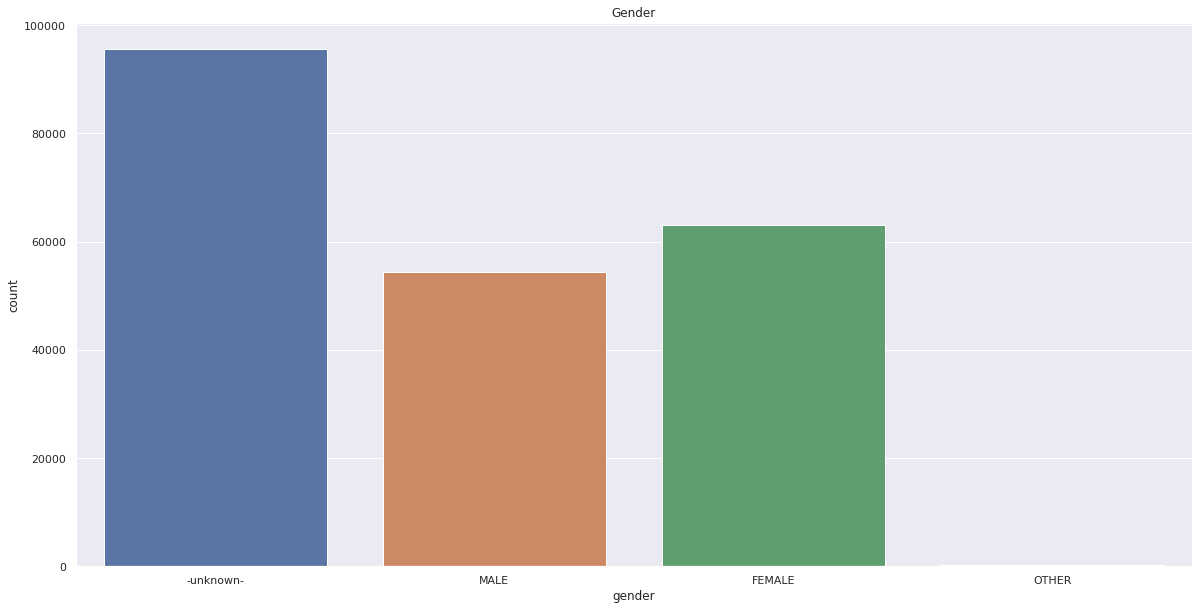

In [16]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", data=train)

plt.title("Gender")

plt.show()

**Maximum users don't disclose their age. Also we see more no of females use Airbnb for booking than male**

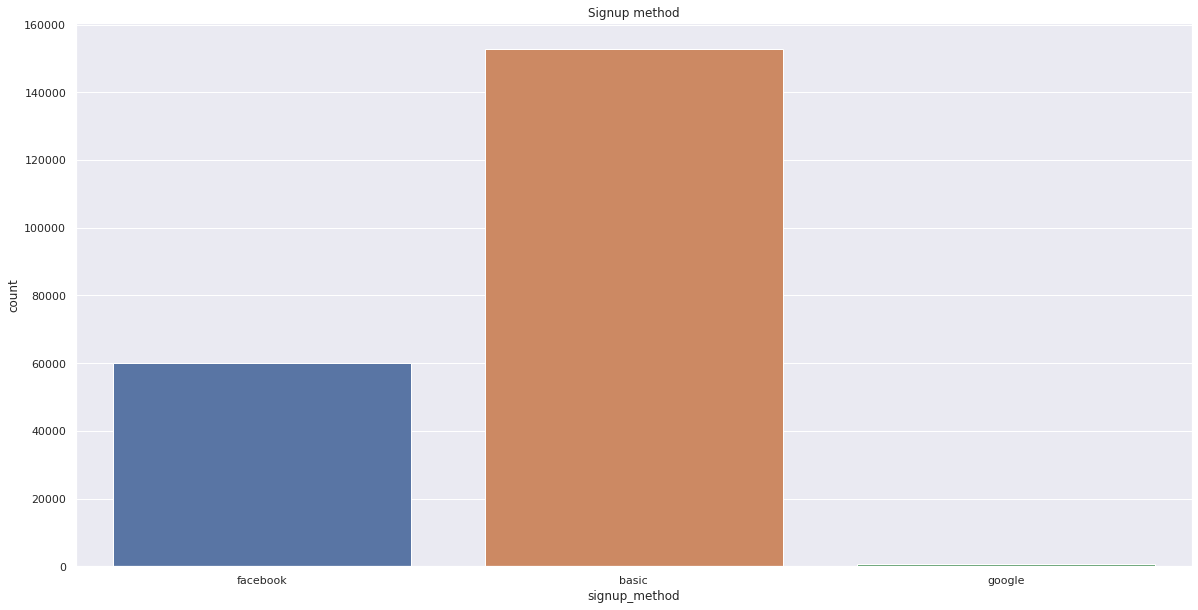

In [17]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="signup_method", data=train)
plt.title("Signup method")

plt.show()

**Most users (almost 2x facebook ) use basic signup followed by facebook for booking on Airbnb. Share of google is marginal**

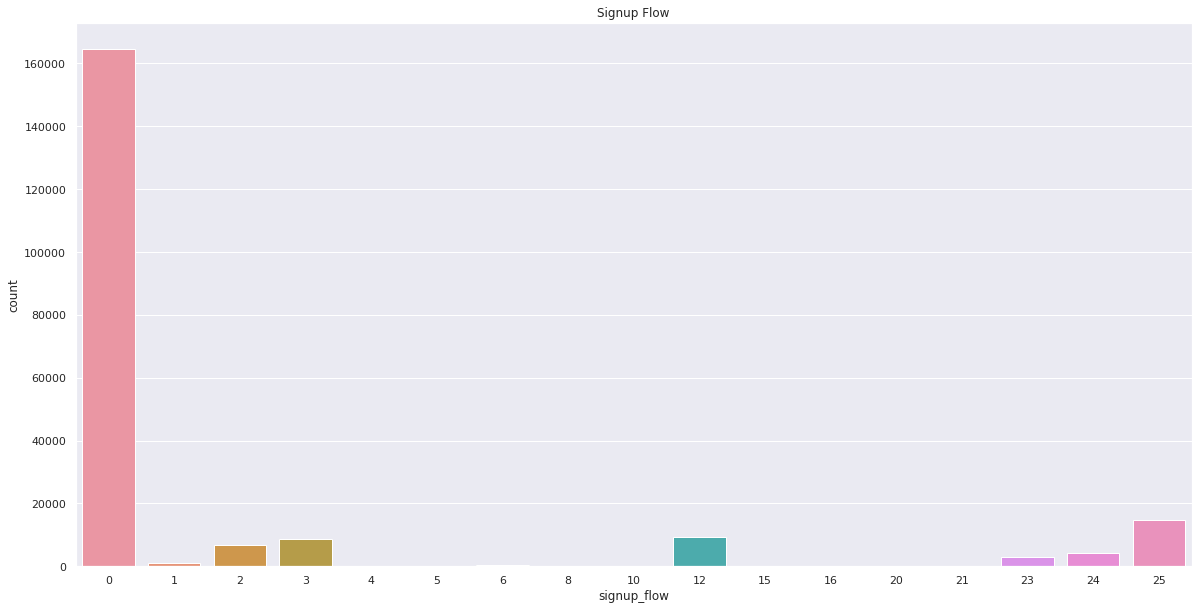

In [18]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_flow", data=train)

plt.title("Signup Flow")

plt.show()

**Bulk of users' signup flow is 0. Other than 1,2,3,12,23,24 and 25, all others have negligible share**

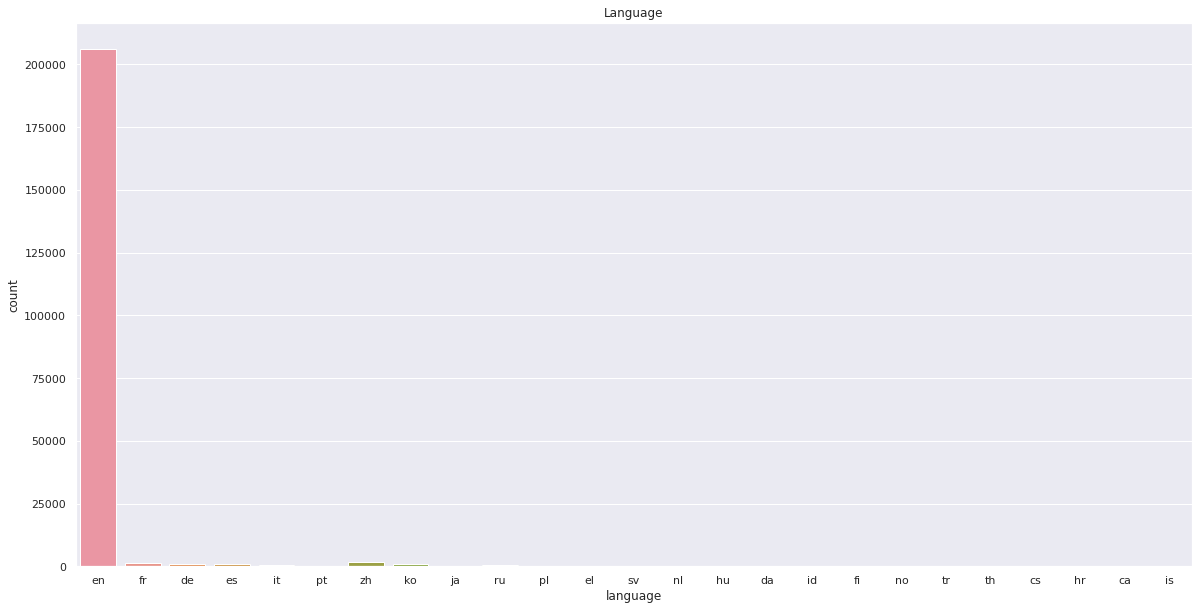

In [19]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="language", data=train)

plt.title("Language")

plt.show()

**Since most users are American and Airbnb is an American company, maximum users use English language.There is some share for fr and zh.Shares of other is miniscule**

In [20]:
train['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

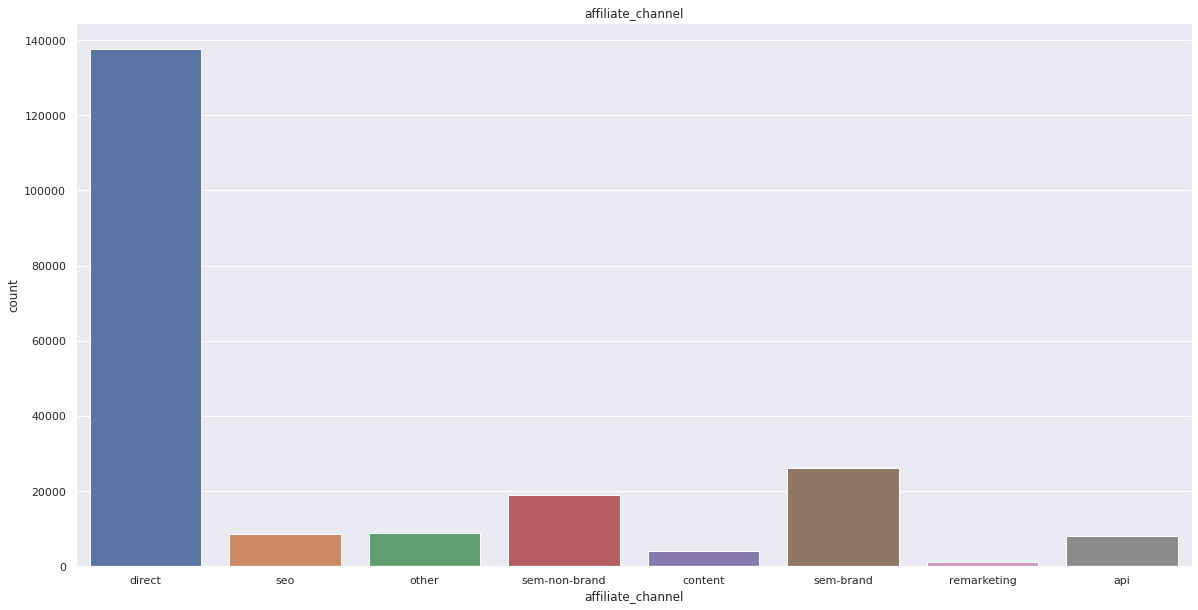

In [21]:

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="affiliate_channel", data=train)

plt.title("affiliate_channel")

plt.show()

**Majority of users' affiliate channel is direct.
Remarketing has the least share.**

In [22]:
train['affiliate_channel'].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

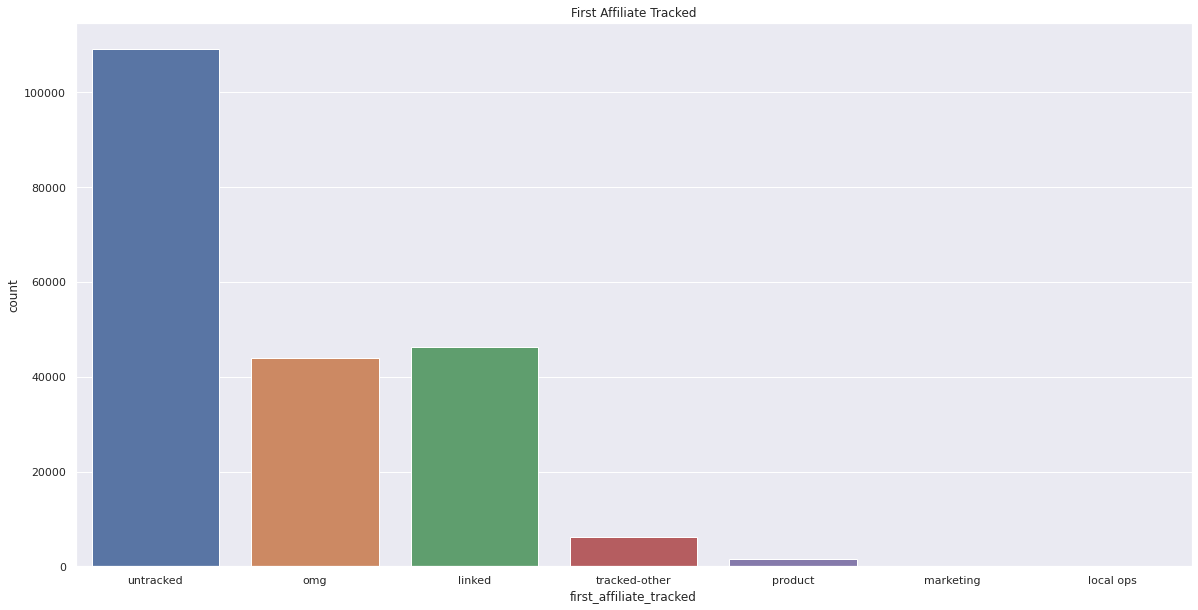

In [23]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_affiliate_tracked", data=train)

plt.title("First Affiliate Tracked")

plt.show()

In [24]:
train['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

**Majority of users first affiliate tracked is untracked, while marketing and local ops have the least share.**

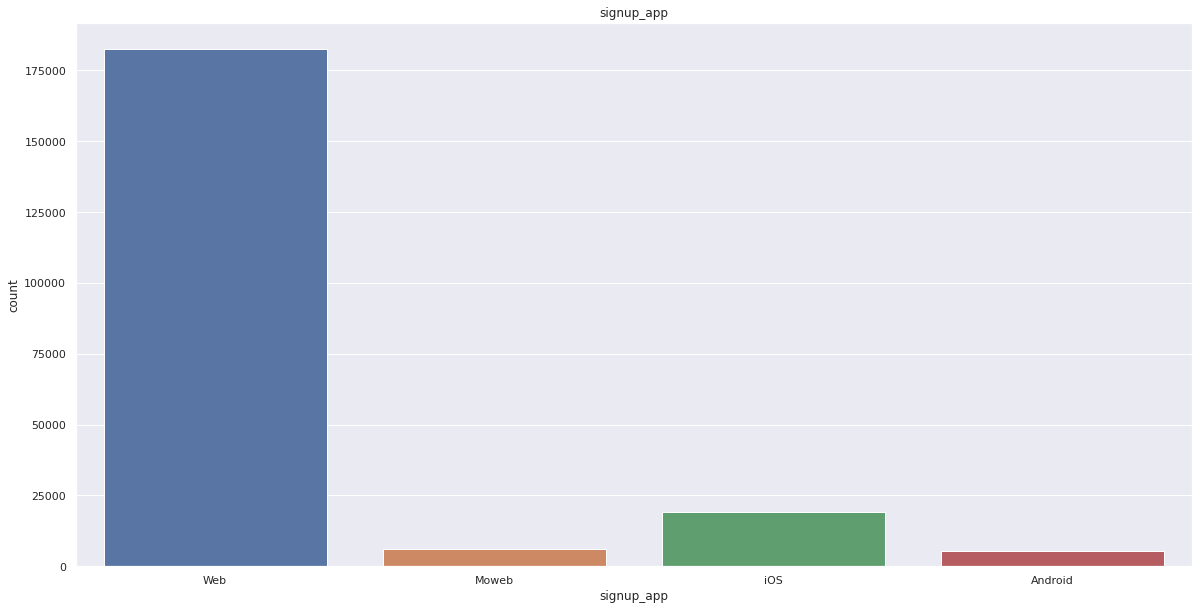

In [25]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", data=train)

plt.title("signup_app")

plt.show()

Max no of users used Web for booking followed by iOS, Moweb and android 

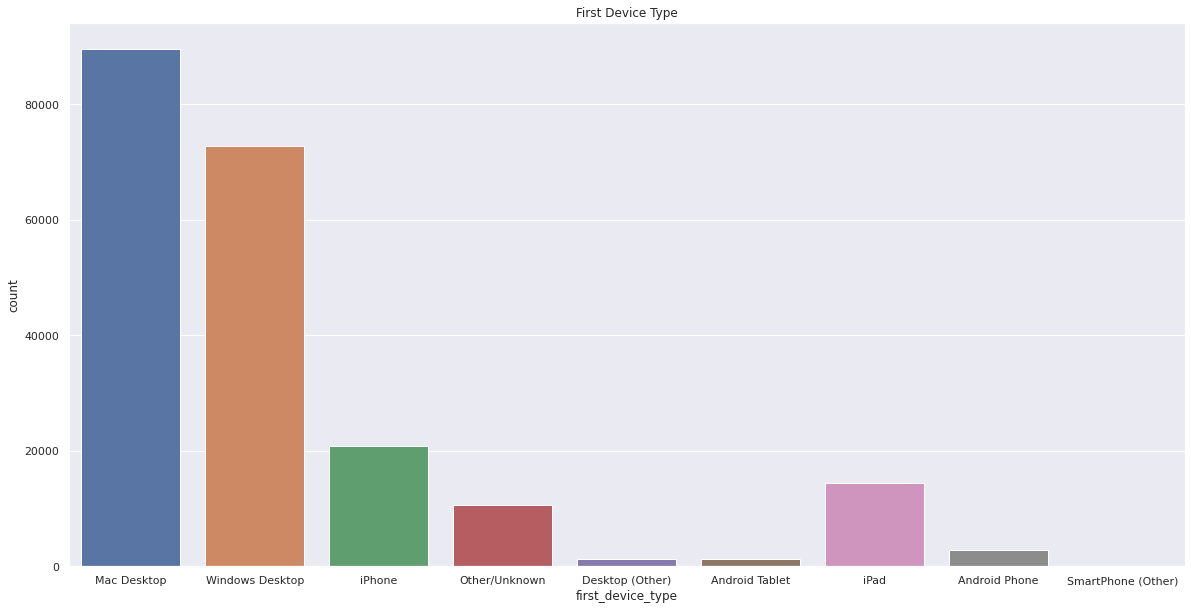

In [26]:

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_device_type", data=train)

plt.title("First Device Type")

plt.show()

**Most users use Mac desktop which is very common in US, followed closely by Windows desktop,iphone and ipad.Share of smartphones is least.**

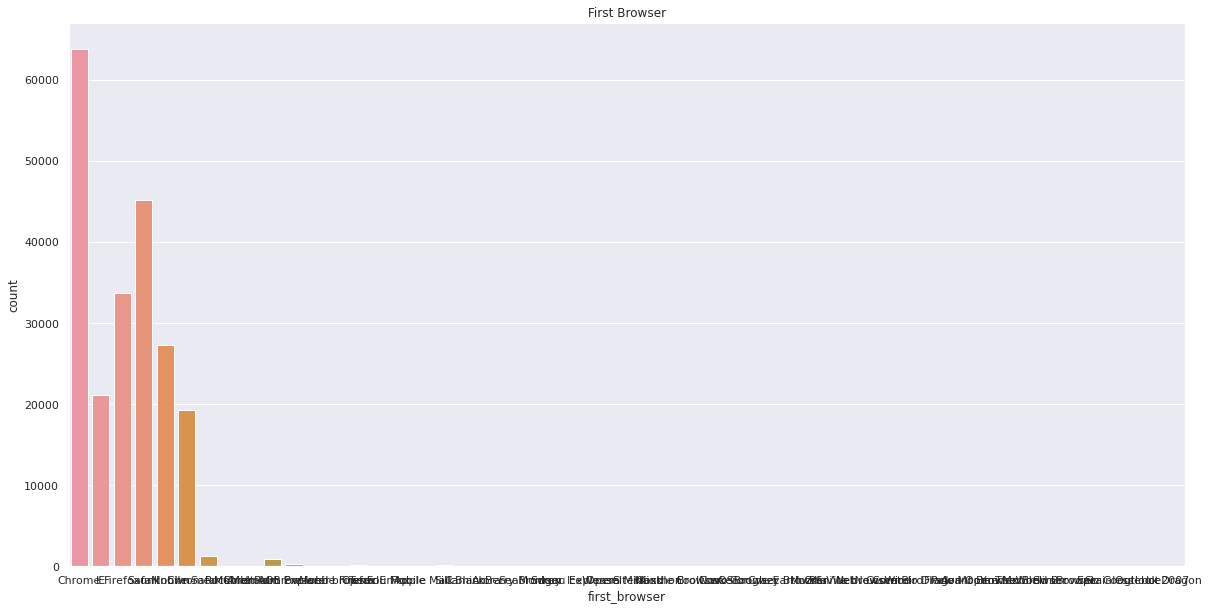

In [27]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_browser", data=train)

plt.title("First Browser")

plt.show()

In [28]:
train['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
TheWorld B

**Majority of the users use chrome,safari,firefox and unknown browsers for booking via Airbnb**

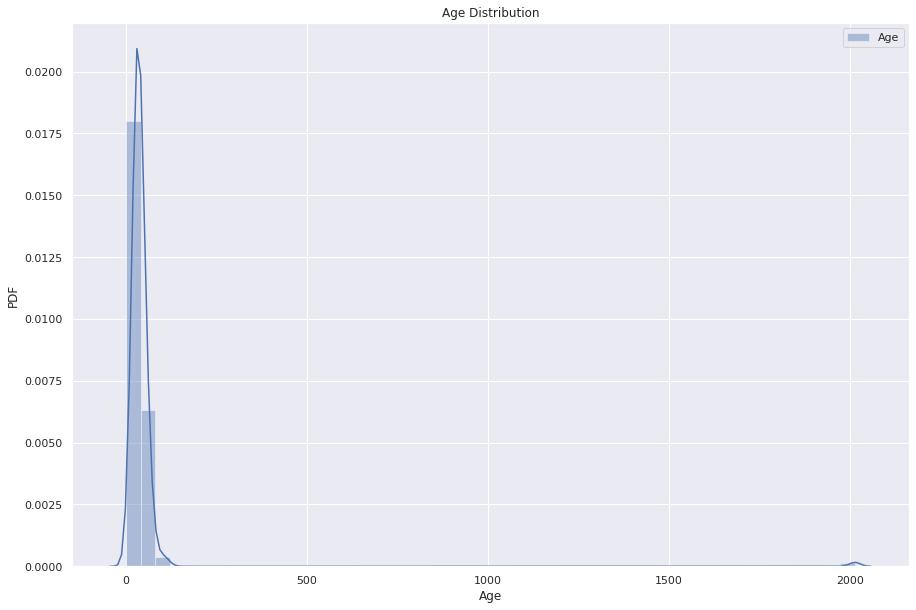

In [29]:
plt.figure(figsize=(15,10))

ax = sns.distplot(train['age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

**We see some unexpected values for age for e.g 2000. They may have filled year of birth instead. It's a noise that needs remedy**

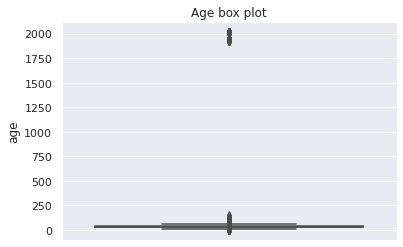

In [30]:
sns.boxplot(y='age',data=train)

plt.title("Age box plot")

plt.show()

**Skewness in shape of boxplot umplies the presence of outliers.**

*Bivariate Analysis*

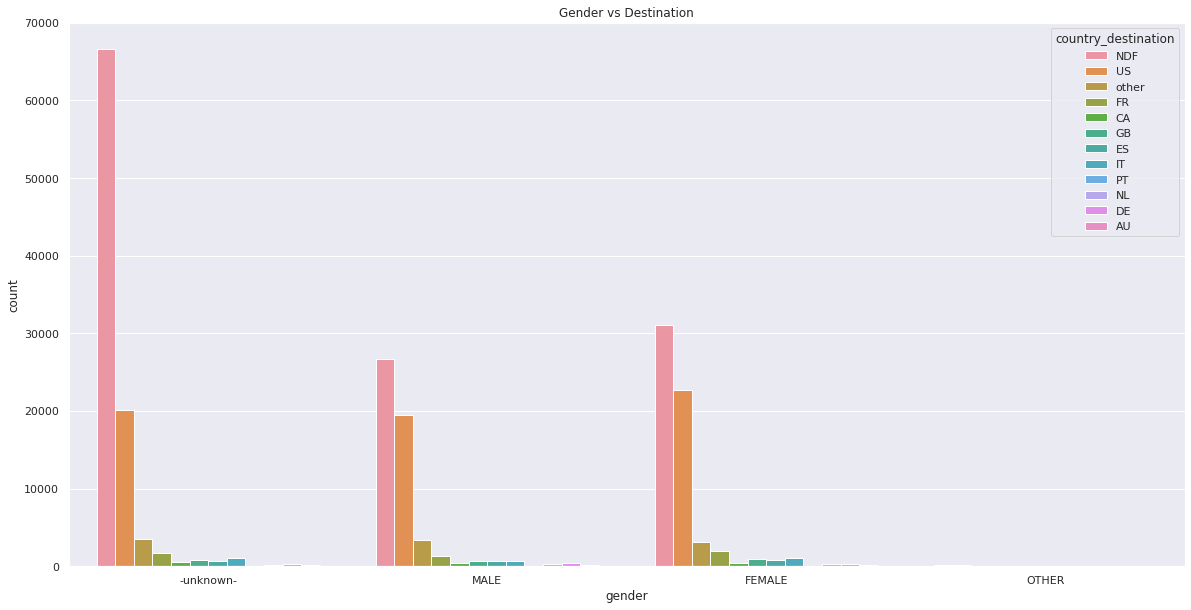

In [31]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=train)

plt.title("Gender vs Destination")

plt.show()

**Majority of users travel to 'other' implying country not in given list after NDF and US.More no of female users visit France than male**

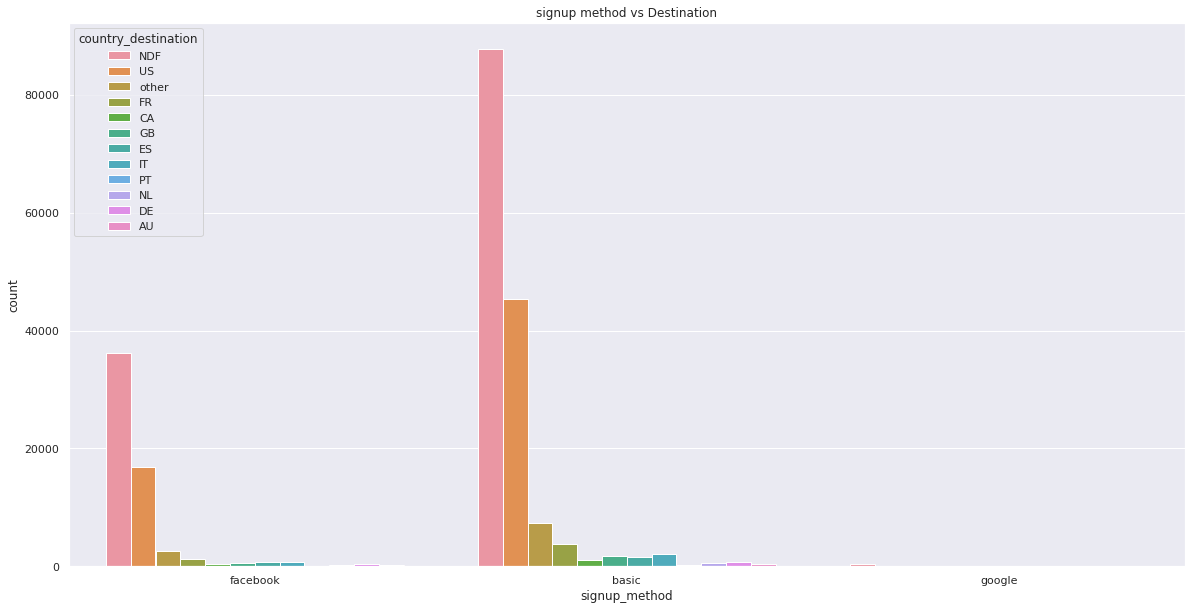

In [32]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=train)

plt.title("signup method vs Destination")

plt.show()

**Very less no of sign ups are done via google.Max Basic sign up is done by users from US**

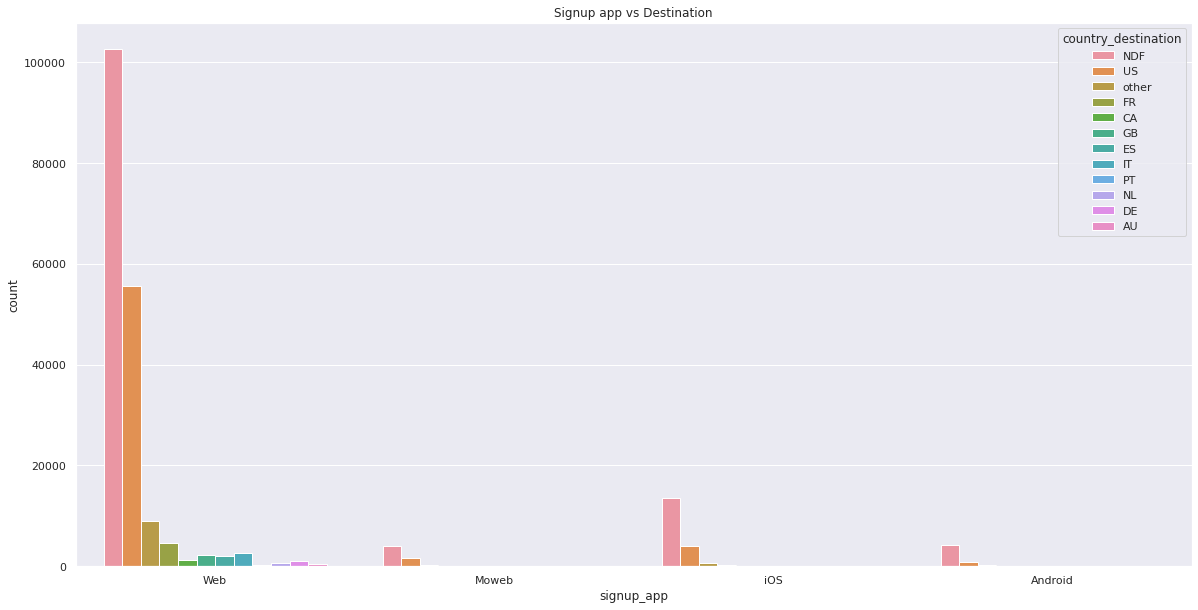

In [33]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", hue="country_destination", data=train)

plt.title("Signup app vs Destination")

plt.show()

Mostly web booking done by users followed by iOS and Moweb, while least used is android. 

*Some other Analysis*

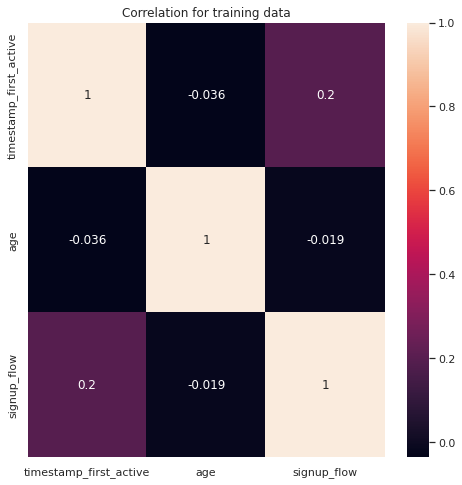

In [34]:
corr=train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, ax=ax)
plt.title('Correlation for training data')
plt.show()

**We don't observe high correlation among features**

In [35]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [36]:
train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


*Multivariate Analysis using tSNE*

In [37]:
from sklearn.preprocessing import StandardScaler

**We need to standardize numerical features first, before applying tSNE**

In [38]:
age_scalar = StandardScaler()
age_scalar.fit(train['age'].values.reshape(-1,1))
age_standardized = age_scalar.transform(train['age'].values.reshape(-1, 1))
print(train[:1])

signup_flow_scaler=StandardScaler()
signup_flow_scaler.fit(train['signup_flow'].values.reshape(-1,1))
signup_flow_scaler = signup_flow_scaler.transform(train['signup_flow'].values.reshape(-1, 1))
print(train[:1])

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   

      gender  age signup_method  signup_flow language affiliate_channel  \
0  -unknown-  NaN      facebook            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   

      gender  age signup_method  signup_flow language affiliate_channel  \
0  -unknown-  NaN      facebook            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Ma

**For categorical features we use one hot encoding using a function, since code will remain the same for all features.**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer  #https://www.kaggle.com/code/keitazoumana/eda-and-tsne-on-titanic-dataset/notebook

# As the process will be the same all the time, we will create a function
def create_one_hot_vect(data, column):
    cat_columns = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked','signup_app','first_device_type','first_browser']
    
    if(column in cat_columns):
        data[column] =data[column].apply(lambda x: np.str_(x))
        
    col = set(data[column].values)

    vectorizer = CountVectorizer(vocabulary=list(col), lowercase=False, binary=True)
    vectorizer.fit(data[column].values)
    print(vectorizer.get_feature_names())

    col_one_hot = vectorizer.transform(data[column].values)
    return col_one_hot

In [40]:
gender_one_hot = create_one_hot_vect(train, 'gender')
print("Shape of matrix after one hot encodig ",gender_one_hot.shape)

# Look at the binarized sex feature.
gender_one_hot

['-unknown-', 'MALE', 'FEMALE', 'OTHER']
Shape of matrix after one hot encodig  (213451, 4)


<213451x4 sparse matrix of type '<class 'numpy.int64'>'
	with 117763 stored elements in Compressed Sparse Row format>

In [41]:
signup_method_one_hot = create_one_hot_vect(train, 'signup_method')
print("Shape of matrix after one hot encodig ",signup_method_one_hot.shape)

# Look at the binarized sex feature.
signup_method_one_hot

language_one_hot = create_one_hot_vect(train, 'language')
print("Shape of matrix after one hot encodig ",language_one_hot.shape)

affiliate_channel_one_hot = create_one_hot_vect(train, 'affiliate_channel')
print("Shape of matrix after one hot encodig ",affiliate_channel_one_hot.shape)

affiliate_provider_one_hot = create_one_hot_vect(train, 'affiliate_provider')
print("Shape of matrix after one hot encodig ",affiliate_provider_one_hot.shape)


first_affiliate_tracked_one_hot = create_one_hot_vect(train, 'first_affiliate_tracked')
print("Shape of matrix after one hot encodig ",first_affiliate_tracked_one_hot.shape)
    
signup_app_one_hot = create_one_hot_vect(train, 'signup_app')
print("Shape of matrix after one hot encodig ",signup_app_one_hot.shape)

first_device_type_one_hot = create_one_hot_vect(train, 'first_device_type')
print("Shape of matrix after one hot encodig ",first_device_type_one_hot.shape)


first_browser_one_hot = create_one_hot_vect(train, 'first_browser')
print("Shape of matrix after one hot encodig ",first_browser_one_hot)



['facebook', 'basic', 'google']
Shape of matrix after one hot encodig  (213451, 3)
['is', 'en', 'da', 'de', 'zh', 'cs', 'ja', 'no', 'th', 'el', 'id', 'hr', 'it', 'ru', 'tr', 'fr', 'hu', 'pl', 'ca', 'ko', 'es', 'pt', 'fi', 'sv', 'nl']
Shape of matrix after one hot encodig  (213451, 25)
['sem-brand', 'seo', 'remarketing', 'api', 'direct', 'sem-non-brand', 'other', 'content']
Shape of matrix after one hot encodig  (213451, 8)
['vast', 'naver', 'gsp', 'bing', 'meetup', 'facebook-open-graph', 'baidu', 'craigslist', 'direct', 'other', 'facebook', 'google', 'padmapper', 'daum', 'email-marketing', 'yahoo', 'yandex', 'wayn']
Shape of matrix after one hot encodig  (213451, 18)
['tracked-other', 'local ops', 'omg', 'linked', 'nan', 'product', 'marketing', 'untracked']
Shape of matrix after one hot encodig  (213451, 8)
['Web', 'Moweb', 'iOS', 'Android']
Shape of matrix after one hot encodig  (213451, 4)
['Other/Unknown', 'Android Tablet', 'iPhone', 'iPad', 'Android Phone', 'Desktop (Other)', 'Mac 

In [42]:
from scipy.sparse import hstack
from sklearn.manifold import TSNE

In [43]:
train_data_matrix = hstack((age_standardized,signup_flow_scaler,
                             gender_one_hot,language_one_hot,signup_method_one_hot,affiliate_channel_one_hot,affiliate_provider_one_hot,first_affiliate_tracked_one_hot,signup_app_one_hot,first_device_type_one_hot,first_browser_one_hot))

print(train_data_matrix.shape)

(213451, 133)


In [ ]:
X = train_data_matrix.toarray()
y = train['country_destination']

tsne = TSNE(n_components=2, random_state=0, perplexity=50)

# Without the expression "np.nan_to_num(X)" we get the below error: 
# ValueError: Input contains NaN, infinity or a value too large for dtype('float32')

X_embedding = tsne.fit_transform(np.nan_to_num(X))

for_tsne = np.vstack((X_embedding.T, y)).T

for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])


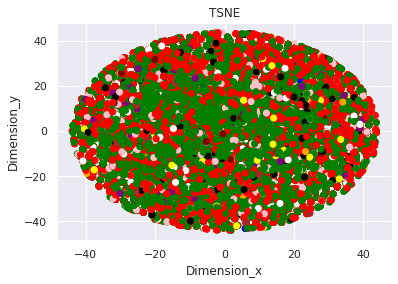

In [49]:
colors = {'US':'red', 'NDF':'green', 'FR':'black', 'other':'pink', 'CA':'brown', 'GB':'yellow', 'ES':'purple', 'IT':'white','PT':'blue', 'NL':'maroon',
       'DE':'purple','AU':'orange'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.xlabel('Dimension_x')
plt.ylabel('Dimension_y')
plt.title('TSNE')
plt.show()

**No clear seperation of data is obtained by reducing dimensions of data using tSNE**